## Let's import the required libraries!

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import  SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, cross_val_predict, train_test_split

In [2]:
#importing the data
df = pd.read_csv('C:/Users/Ijaz10/Desktop/CSV/telecom_churn.csv')

In [3]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
X = df.drop(['State', 'Area code','Churn'], axis = 1)    #independent variable
y = df['Churn']   #target variable

In [5]:
#We are separating numerical data and categorical data for encoding purpose

x_num = X.drop(['International plan', 'Voice mail plan'], axis = 1)   
x_cat = X[['International plan', 'Voice mail plan']]

In [6]:
#Numerical Pipeline
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('StandardScaler', StandardScaler())
])

#Categorical Pipeline
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('encoder', OneHotEncoder())
])

#Combining both the Pipelines
preprocessor = ColumnTransformer([
    ('num', num_pipe, x_num.columns),
    ('cat', cat_pipe, x_cat.columns)
])

In [7]:
#Transforming the data

X_new = preprocessor.fit_transform(X)



In [8]:
#Splitting the data into train and test sets

train_x, test_x, train_y, test_y = train_test_split(X_new, y, test_size = 0.2, random_state = 0)

In [10]:
#Defining the model

poly_svm = SVC(kernel = 'poly') #Polynomial Kernel

In [11]:
poly_svm

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
param_grid = [{
    'C' : [ 0.1, 1, 10, 100],
    'degree' : [3, 5, 10]
}]

In [13]:
#Training the model with several combinations via GridSearchCV

poly_svm_grid = GridSearchCV(poly_svm, param_grid, cv = 3, scoring = 'accuracy')

In [14]:
poly_svm_grid.fit(X_new, y)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.1, 1, 10, 100], 'degree': [3, 5, 10]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [15]:
poly_svm_grid.best_score_

0.9147914791479148

In [16]:
poly_svm_grid.best_params_

{'C': 1, 'degree': 3}

In [17]:
#Now we will train the best model

best_poly_svm = poly_svm_grid.best_estimator_

In [18]:
best_poly_svm.fit(train_x, train_y)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
poly_preds = best_poly_svm.predict(test_x)

In [20]:
#Accuracy test
print(best_poly_svm.score(train_x, train_y))   #Training accuracy
print(best_poly_svm.score(test_x, test_y) )  #Testing accuracy

0.9426106526631658
0.9190404797601199


### It's quiet perfectly fitted model (Not Overfitted)!

### But generally in Classification we don't go for accuracy. We look for the precision-recall score

In [21]:
#Confusion Matrix

confusion_matrix(test_y, poly_preds)

array([[570,   9],
       [ 45,  43]], dtype=int64)

In [23]:
#now lets see the precision and recall score

print('Precision : %f'%(precision_score(test_y, poly_preds)))
print('Recall : %f'%(recall_score(test_y, poly_preds)))

Precision : 0.826923
Recall : 0.488636


In [25]:
#Now lets train the Gaussian Radial Basis Function (RBF) kernel

rbf_svm = SVC(kernel = 'rbf')

In [26]:
rbf_svm

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
params = [{
    'C' : [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma' : [0.01, 0.1, 1, 3, 5]
}]

rbf_grid = GridSearchCV(rbf_svm, params, cv = 3, scoring = 'accuracy')

In [32]:
rbf_grid.fit(X_new, y)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.01, 0.1, 1, 3, 5]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [61]:
rbf_grid.best_score_ 


0.9162916291629163

In [35]:
#Best parameter
rbf_grid.best_params_

{'C': 100, 'gamma': 0.01}

In [36]:
#Lets take out the best model

best_rbf_svm = rbf_grid.best_estimator_

In [37]:
best_rbf_svm.fit(train_x, train_y)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [38]:
rbf_pred = best_rbf_svm.predict(test_x)

In [41]:
#Confusion Matrix
confusion_matrix(test_y, rbf_pred)

array([[569,  10],
       [ 35,  53]], dtype=int64)

In [42]:
#Lets look at the precision and recall score

print('Precision : %f'%(precision_score(test_y, rbf_pred)))
print('Recall : %f'%(recall_score(test_y, rbf_pred)))

Precision : 0.841270
Recall : 0.602273


### Here we have the improved precision and recall score compared to Polynomial kernel

In [63]:
#First we will calculate the decision scores 
from sklearn.model_selection import cross_val_predict
poly_scores = cross_val_predict(best_poly_svm, test_x, test_y, cv = 3, 
                               method = 'decision_function')

poly_fpr, poly_tpr, poly_thres = roc_curve(test_y, poly_scores)

In [64]:
#we'll do same for the rbf model

rbf_scores = cross_val_predict(best_rbf_svm, test_x, test_y, cv = 3, 
                              method = 'decision_function')
rbf_fpr, rbf_tpr, rbf_thres = roc_curve(test_y, rbf_scores)

In [65]:
#defining plotting roc curve function
"""
fpr : False Positive Rate
tpr : True Positive Rate
"""
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, 'g-', label = label)
    plt.plot([0, 1], [0, 1], 'b:')
    plt.grid()
    plt.legend(loc = 'lower right')
    plt.xlabel('False Positive Rate')
    plt.ylabel("True Positive Rate")
    plt.title('ROC Curve')
    plt.show()
    

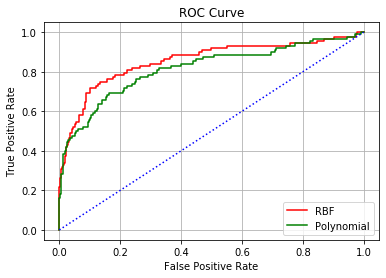

In [66]:
plt.plot(rbf_fpr, rbf_tpr, 'r-', label = 'RBF')
plot_roc_curve(poly_fpr, poly_tpr, label = 'Polynomial')


### From the above curve, we can conclude that the RBF kernel is slightly better than Polynomial kernel.

In [67]:
#We will see the area_under_curve(AUC score) score

print('RBF AUC score : %f'%roc_auc_score(test_y, rbf_scores))
print('Polynomial AUC score : %f'%roc_auc_score(test_y, poly_scores))

RBF AUC score : 0.855374
Polynomial AUC score : 0.815807


### Hence from AUC scores of both the models, it is clear that RBF kernel is better fitted model.